# Homework 5

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Section 1: Harvard Case

*This section will not be graded, but it will be discussed in class.*

**Smart Beta Exchange-Traded-Funds and Factor Investing**.

* The case is a good introduction to important pricing factors.
* It also gives useful introduction and context to ETFs, passive vs active investing, and so-called “smart beta” funds.

1. Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

2. Is the factor portfolio...
* long-only
* long-short
* value-weighted
* equally-weighted

4. What steps are taken in the factor construction to try to reduce the correlation between the factors?
5. What is the point of figures 1-6?
6. How is a “smart beta” ETF different from a traditional ETF?
7. Is it possible for all investors to have exposure to the “value” factor?
8. How does factor investing differ from traditional diversification?


If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions as mf

path = "../../data/factor_pricing_data.xlsx"
factor_pricing_data = pd.read_excel(path, sheet_name="factors (excess returns)", index_col=0)

1. Analyze the factors, similar to how you analyzed the three Fama-French factors in Homework 4.
You now have three additional factors, so let’s compare there univariate statistics. • mean
• volatility
• Sharpe

In [18]:
mf.get_metric_returns(factor_pricing_data, adj_factor=12, VaR_q=5)[['Mean', 'Volatility', 'Sharpe_Ratio','Max Drawdown']].style.format("{:.2%}")

c:\Users\josel\Documents\GitHub\finm-portfolio-2024\homework\my_homework\my_functions.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, aux_result], axis=0)
c:\Users\josel\Documents\GitHub\finm-portfolio-2024\homework\my_homework\my_functions.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, aux_result], axis=0)


,Mean,Volatility,Sharpe_Ratio,Max Drawdown
MKT,8.63%,15.69%,54.99%,-54.36%
SMB,0.83%,10.19%,8.17%,-56.09%
HML,2.58%,11.00%,23.46%,-58.41%
RMW,4.71%,8.32%,56.60%,-41.21%
CMA,2.95%,7.31%,40.41%,-25.25%
UMD,6.27%,15.46%,40.57%,-57.64%


<Axes: xlabel='Date'>

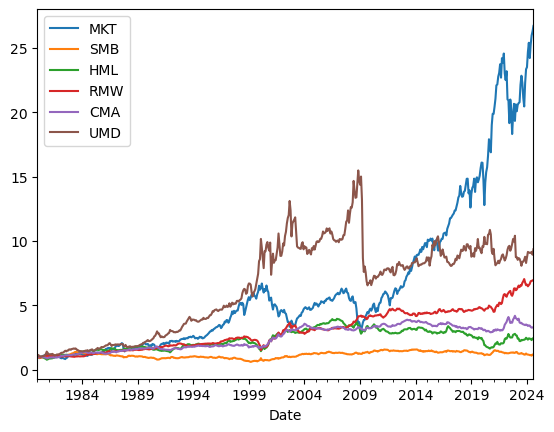

In [19]:
(1+factor_pricing_data).cumprod().plot()

In [20]:
mf.get_metric_returns(factor_pricing_data[factor_pricing_data.index >= "2015-01-01"], adj_factor=12, VaR_q=5)[['Mean', 'Volatility', 'Sharpe_Ratio','Max Drawdown']].style.format("{:.2%}")

c:\Users\josel\Documents\GitHub\finm-portfolio-2024\homework\my_homework\my_functions.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, aux_result], axis=0)
c:\Users\josel\Documents\GitHub\finm-portfolio-2024\homework\my_homework\my_functions.py:63: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, aux_result], axis=0)
c:\Users\josel\Documents\GitHub\finm-portfolio-2024\homework\my_homework\my_functions.py:63: FutureWarning: The behavior of 

,Mean,Volatility,Sharpe_Ratio,Max Drawdown
MKT,11.66%,16.03%,72.74%,-25.45%
SMB,-1.95%,10.45%,-18.66%,-27.70%
HML,-1.79%,13.27%,-13.45%,-51.40%
RMW,5.09%,7.33%,69.39%,-9.69%
CMA,-0.84%,8.40%,-10.01%,-21.98%
UMD,2.11%,14.08%,14.97%,-25.66%


<Axes: title={'center': 'Factor Pricing Data (2015-2020)'}, xlabel='Date'>

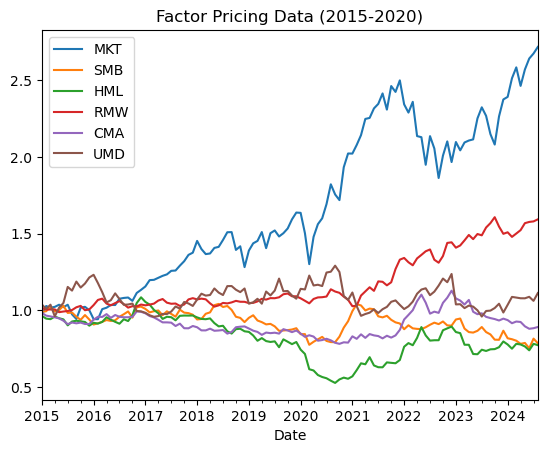

In [21]:
(1 + factor_pricing_data[factor_pricing_data.index >= "2015-01-01"]).cumprod().plot(title="Factor Pricing Data (2015-2020)")

2. Based on the factor statistics above, answer the following:

a. Does each factor have a positive risk premium (positive expected excess return)? 

*Answer* : When analyzing the entire sample period since 1980, all the factors exhibit positive expected excess returns. However, it's important to highlight that only the Momentum factor (`UMD`) demonstrated superior performance in terms of risk-adjusted returns, as measured by the Sharpe Ratio. The other factors, despite their positive excess returns, showed worse performance compared to the market when adjusting for risk, indicated by lower Sharpe Ratios.

b. How have the factors performed since the time of the case, (2015-present)?

*Answer* : From 2015 to the present, we have observed that several factors—including Size, Value, and Investment—have exhibited negative risk premiums. During this period, none of the factors outperformed the market in terms of risk-adjusted returns. However, the Momentum factor once again demonstrated the best performance among the factors, even though it did not surpass the market.

3. Report the correlation matrix across the six factors.

* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

<Axes: >

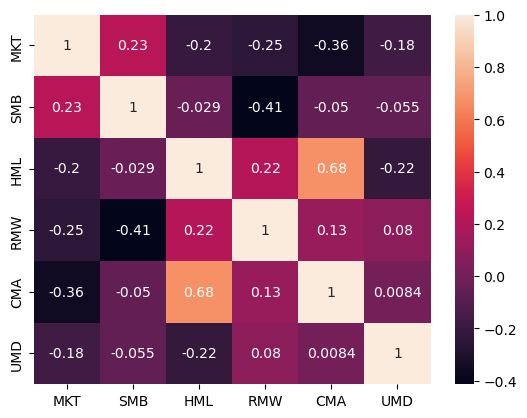

In [22]:
sns.heatmap(factor_pricing_data.corr(), annot=True)

*Answer*

- Low Correlations Among Factors: Throughout the entire sample period from 1980 to the present, the factors effectively exhibited low correlations with each other and with the market. This suggests that the construction method successfully maintained low correlations among the factors.

- Redundancy of the Value Factor: However, we observe that the Value factor (`HML`) shows a relatively high correlation with the Investment factor (`CMA`), as Fama and French suggested in their paper. This indicates that the Value factor could be redundant in the five-factor model.

4. Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now? 
* What do you conclude about the importance or unimportance of these styles?

In [23]:
w_tang_5_factors = mf.weights_tang(factor_pricing_data, adj_factor=12)
w_tang_3_factors = mf.weights_tang(factor_pricing_data[['MKT', 'SMB', 'HML','UMD']], adj_factor=12)
w_tang = pd.merge(w_tang_5_factors, w_tang_3_factors, left_index=True, right_index=True, how="left").fillna(0)
w_tang.columns = ['5_factors', '3_factors']
w_tang.style.format("{:.2%}")


,5_factors,3_factors
MKT,20.98%,36.55%
SMB,7.73%,-3.24%
HML,-4.21%,35.62%
RMW,31.33%,0.00%
CMA,33.90%,0.00%
UMD,10.28%,31.07%


<Axes: xlabel='index', ylabel='Value'>

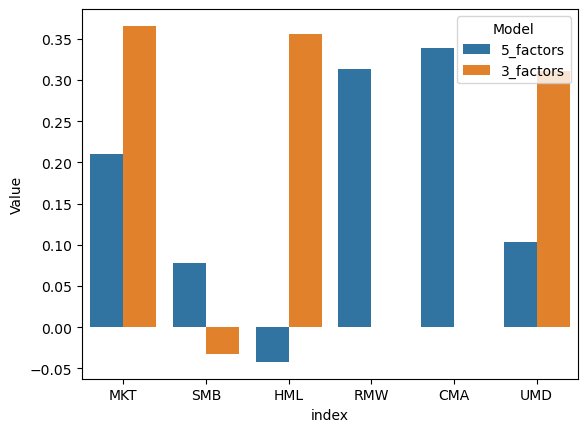

In [24]:
sns.barplot(pd.melt(w_tang.reset_index(), id_vars='index', var_name='Model', value_name='Value'), x='index', y='Value', hue='Model')

* Which factors seem most important? And Least?

*Answer* : The factors that appear most important are Profitability (`RMW`) and Investment (`CMA`), each carrying a weight of approximately 30% in the tangency portfolio. Conversely, the Value factor (`HML`) is the least important, with a weight of only 4.2%. This low weighting for `HML` can be attributed to its high correlation with CMA and the higher Sharpe Ratio of `CMA` compared to `HML`. As a result, the tangency portfolio assigns a higher weight to `CMA` over `HML`.

* Are the factors with low mean returns still useful?

*Answer* : Yes, factors with low mean returns can still be useful. For instance, the Investment factor (`CMA`) and the Size factor (`SMB`) have mean returns of 2.95% and 9.83%, respectively. Despite their lower mean returns, they receive significant weights in the tangency portfolio—33.90% for `CMA` and 7.73% for `SMB`. This indicates that these factors contribute positively to the portfolio's risk-return profile, possibly due to their diversification benefits or favorable risk-adjusted returns.



* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

*Answer* : After reconstructing the tangency portfolio with only the Market (`MKT`), Size (`SMB`), Value (`HML`), and Momentum (`UMD`) factors, the Market (`MKT`), Value (`HML`) and  Momentum (`UMD`) factors receive almost the same weight (around 30%). The least important factor in this case is the Size factor (`SMB`), which has a weight of only -3.24%.



* What do you conclude about the importance or unimportance of these styles?

*Answer* :  We can conclude that the Value factor (`HML`) may become unnecessary when the Investment factor (`CMA`) is included in the portfolio. In the three-factor model, Value (HML) had a higher weight, but it becomes almost irrelevant in the five-factor model due to its redundancy with `CMA`. This suggests that `CMA` captures similar risks or returns as HML, rendering HML less significant when both are present. Additionally, in the five-factor model, traditional factors like Size (`SMB`) and Value (`HML`) receive lower weights compared to other factors, indicating they may be less important within the expanded model.

***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

We are not saying this is “the” AQR model, but it is a good illustration of their most publicized factors: value, momentum, and more recently, profitability.

For instance, for the AQR model is...

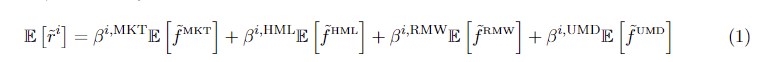

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

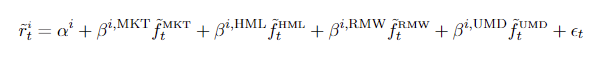

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)

* For each regression, report the estimated α and r-squared.
* Calculate the mean-absolute-error of the estimated alphas.

In [25]:
import statsmodels.api as sm

path = "../../data/factor_pricing_data.xlsx"
portfolio_pricing_data = pd.read_excel(path, sheet_name="portfolios (excess returns)", index_col=0)

In [26]:
CAPM = sm.add_constant(factor_pricing_data['MKT'])
AQR = sm.add_constant(factor_pricing_data[['MKT', 'HML','RMW', 'UMD']])
FF3 = sm.add_constant(factor_pricing_data[['MKT', 'SMB', 'HML']])
FF5 = sm.add_constant(factor_pricing_data[['MKT', 'SMB', 'HML', 'RMW', 'CMA']])
factor_list = [CAPM, AQR, FF3, FF5]
factor_list_names = ['CAPM', 'AQR', 'FF3', 'FF5']
factor_list = list(zip(factor_list, factor_list_names))

results_list = []

for portfolio in portfolio_pricing_data.columns:
    for factor, name in factor_list:
        model = sm.OLS(portfolio_pricing_data[portfolio], factor).fit()
        alpha = model.params[0]
        r_squared = model.rsquared
        results_list.append({
            "Model": name,
            "Portfolio": portfolio,
            "Alpha": alpha,
            "R_squared": r_squared
        })

results = pd.DataFrame(results_list)

results = results[['Model', 'Portfolio', 'Alpha', 'R_squared']]

C:\Users\josel\AppData\Local\Temp\ipykernel_21452\2278205139.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


In [27]:
results[results.Model == "AQR"].style.format({"Alpha": "{:.2%}", "R_squared": "{:.2%}"})

,Model,Portfolio,Alpha,R_squared
1,AQR,Agric,0.06%,33.92%
5,AQR,Food,0.06%,46.42%
9,AQR,Soda,0.14%,30.84%
13,AQR,Beer,0.14%,42.08%
17,AQR,Smoke,0.29%,27.35%
21,AQR,Toys,-0.31%,50.83%
25,AQR,Fun,0.25%,61.65%
29,AQR,Books,-0.25%,68.68%
33,AQR,Hshld,-0.07%,55.84%
37,AQR,Clths,-0.15%,61.83%


In [28]:
print(f"The mean absolute alpha is {results[results.Model == "AQR"].Alpha.abs().mean()*12:.2%} for the AQR model")

The mean absolute alpha is 2.30% for the AQR model


In [29]:
results.groupby('Model')['Alpha'].apply(lambda x: x.abs().mean()*12).to_frame().style.format("{:.2%}")

,Alpha
Model,
AQR,2.30%
CAPM,2.04%
FF3,2.40%
FF5,3.14%


* If the pricing model worked, should these alpha estimates be large or small? Why?
* Based on your MAE stat, does this seem to support the pricing model or not?


2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?

*Answer* : 
- Evaluation of the Pricing Model: If the pricing model were accurate, we would expect the mean absolute value of Alpha (MAE) to be close to zero. However, for all the models analyzed, the MAE is around 2.0% annualized. This suggests that the pricing model may not be correctly capturing the underlying asset pricing dynamics. The CAMP presented the lowest MAE (showing a "better" fit in comparison with the others) and FF5 the highest one.

- Statistical Significance: While the MAE provides an indication of the average magnitude of the errors, it does not tell us whether the mean absolute value of Alpha is statistically different from zero. To determine this, we could perform a t-test to assess the significance of the Alpha values. This test would help us establish whether the observed MAE is due to random chance or indicates a systematic mispricing in the model.


   
3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

*Answer*:

It is uncertain which specific factor is the most influential in asset pricing based on the current analysis. All models showed relatively high Mean Absolute Error (MAE), indicating limited accuracy in their predictions. Among them, the traditional Capital Asset Pricing Model (CAPM) performed better than expected, and the AQR model outperformed both CAPM and the Fama-French model. This suggests that the Fama-French model might benefit from incorporating a momentum factor, as it appears to capture part of the assets' "alpha" that the existing factors miss.

4. This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

In [30]:
results.groupby('Model')['R_squared'].apply(lambda x: x.mean()).to_frame().style.format("{:.2%}")

,R_squared
Model,
AQR,57.49%
CAPM,52.61%
FF3,57.15%
FF5,59.60%


*Anwer* :

All models demonstrate a similar R-squared of around 55%, with the Fama-French 5-factor (FF5) model achieving the highest R-squared at approximately 60%. This suggests that the FF5 model is slightly better at capturing the variance in asset returns. However, given the low R-squared values across all models, it appears that none of them provide a particularly strong linear factor decomposition for this asset pool. This indicates that these models may be limited in explaining the returns of these assets effectively, and alternative approaches or additional factors might be needed to improve explanatory power.

5. We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.
* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?4
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

***

In [31]:
def calc_pricing_regression(rets, factors, intercept=True, adj=12):
    if intercept:
        factors = sm.add_constant(factors)
    summary = {f'{k} Beta': [] for k in factors.columns[1:]}
    summary['Alpha']  = []
    summary['R^2']    = []
    for asset in rets.columns:
        model = sm.OLS(rets[asset], factors).fit()
        for k, _ in summary.items():
            try:
                summary[k].append(model.params[k[:-5]])
            except:
                pass
        summary['R^2'].append(model.rsquared)
        summary['Alpha'].append(model.params[0] * adj)
            
    return pd.DataFrame(summary, index=rets.columns)

def calc_cross_sectional_regression(mean_rets, betas, intercept=False):
    if intercept:
        betas = sm.add_constant(betas)
    model = sm.OLS(mean_rets, betas).fit()
    params = model.params.to_frame('Cross Sectional Regression')
    params.loc['R^2'] = model.rsquared
    params.loc['MAE'] = model.resid.abs().mean() 
    return params

frames = []

ts_premia = portfolio_pricing_data.mean() * 12
factor_list = [CAPM, AQR, FF3, FF5]
factor_list_names = ['CAPM', 'AQR', 'FF3', 'FF5']

for name, X in zip(factor_list_names, factor_list):
    pricing_regr = calc_pricing_regression(portfolio_pricing_data, X, intercept=False)
    res = calc_cross_sectional_regression(ts_premia, pricing_regr.iloc[:, :-2], intercept=False)
    res = res.rename({'Cross Sectional Regression': f'{name} CS'}, axis=1)
    frames.append(res)
summary_cs = pd.concat(frames, axis=1).fillna('')

# Move R^2 and MAE to the top
summary_cs = pd.concat([summary_cs.loc[['R^2', 'MAE']], summary_cs.drop(['R^2', 'MAE'])])
summary_cs_betas = summary_cs[summary_cs.index.str.contains('Beta')].copy()
summary_cs_betas.loc[:, 'Time Series'] = factor_pricing_data.mean().values * 12
summary_cs_betas

C:\Users\josel\AppData\Local\Temp\ipykernel_21452\962354581.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary['Alpha'].append(model.params[0] * adj)
C:\Users\josel\AppData\Local\Temp\ipykernel_21452\962354581.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  summary['Alpha'].append(model.params[0] * adj)
C:\Users\josel\AppData\Local\Temp\ipykernel_21452\962354581.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sum

,CAPM CS,AQR CS,FF3 CS,FF5 CS,Time Series
MKT Beta,0.086096,0.089125,0.102214,0.096486,0.086277
HML Beta,,-0.038711,-0.015204,-0.030994,0.008319
RMW Beta,,0.043748,,0.033605,0.025809
UMD Beta,,0.060747,,,0.047096
SMB Beta,,,-0.064485,-0.056991,0.029537
CMA Beta,,,,-0.011559,0.062709


*Answer* :

In the cross-sectional analysis, we observe that the Size (`SMB`), Value (`HML`), and Investment (`CMA`) factors exhibit negative estimated premia, a significant departure from their results in the time-series analysis. This suggests that these factors behave differently when evaluated across assets at a single point in time compared to their behavior over time. Meanwhile, all other factors, including the market, maintain consistent magnitude and sign across both analyses. This consistency indicates that, unlike `SMB`, `HML`, and `CMA`, these factors are less sensitive to the type of analysis and may have more stable relationships with asset returns across different analytical perspectives.

In [32]:
pd.concat([summary_cs.loc[["MAE"]].T, results.groupby('Model')['Alpha'].apply(lambda x: x.abs().mean()*12).to_frame("MAE")], axis=0).style.format("{:.2%}") 

,MAE
CAPM CS,2.04%
AQR CS,1.65%
FF3 CS,1.51%
FF5 CS,1.30%
AQR,2.30%
CAPM,2.04%
FF3,2.40%
FF5,3.14%


*Answer* :

We observe that all models exhibit a lower Mean Absolute Error (MAE) in cross-sectional analysis compared to time-series analysis, indicating that they perform better across different assets at a single point in time rather than over time. Interestingly, the market model is the only one that maintains a consistent MAE across both analyses. This stability suggests that the market model's predictive performance is less sensitive to the type of analysis, unlike the other models, which may be more effective in capturing asset-specific characteristics than temporal dynamics.